In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from missingno import matrix

In [2]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data = load_data("McDonald_s_Reviews_Cleaned_Classified_Sentiment.csv")
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,processed_review_basic,rating_numeric,rating_numerical,state,Topic,Sentiment,Sentiment_Category
0,29732,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,"1,618",3 years ago,Neutral,3 stars,neutral,3,3.0,FL,1,0.0000,neutral
1,32175,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",4 years ago,Nice,4 stars,nice,4,4.0,TX,5,0.6000,positive
2,17293,McDonald's,Fast food restaurant,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",39.852059,-74.981099,933,a year ago,These are the slowest off-task workers I've ev...,1 star,slowest task worker i've ever seen. stop multi...,1,1.0,NJ,3,0.0000,neutral
3,13768,McDonald's,Fast food restaurant,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",28.450387,-81.471414,"19,671",3 months ago,This McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...,2 stars,mcdonald unique pasta pizza bar arcade upstair...,2,2.0,FL,7,0.3125,positive
4,25283,McDonald's,Fast food restaurant,"7010 Bradlick Shopping Center, Annandale, VA 2...",38.812823,-77.185055,595,5 years ago,Terrible,1 star,terrible,1,1.0,VA,4,-1.0000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,7121,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",a year ago,Like always very pleasing but the area outdoor...,3 stars,like always pleasing area outdoor use tidying....,3,3.0,CA,1,0.8000,positive
3261,14963,McDonald's,Fast food restaurant,"111 Madison St, Oak Park, IL 60302, United States",41.879656,-87.777913,"1,454",5 years ago,Jus go 4 the drinks im 35 out grown the food,3 stars,jus go 4 drink im 35 grown food,3,3.0,IL,6,0.0000,neutral
3262,9685,McDonald's,Fast food restaurant,"1916 M St NW, Washington, DC 20036, United States",38.905456,-77.044235,"1,269",3 years ago,The Service is Excellent,5 stars,service excellent,5,5.0,DC,6,1.0000,positive
3263,19282,McDonald's,Fast food restaurant,"621 Broadway, Newark, NJ 07104, United States",40.771910,-74.161475,"1,564",2 years ago,I go to mc Donald only drive through and my fr...,3 stars,go mc donald drive friend took burger king tru...,3,3.0,NJ,0,0.1000,positive


In [4]:
# Assuming 'store_address' is a column in your dataset
grouped = data.groupby('store_address', as_index=False)  # Keep 'store_address' as a column

# Calculate averages
average_scores = grouped['Sentiment'].mean()
average_rates = grouped['rating_numerical'].mean()

# Combine averages into a new DataFrame
averages_df = pd.DataFrame({
    'Store Address': average_scores['store_address'],  # Directly use 'store_address' from the grouped object
    'Average Sentiment Score': average_scores['Sentiment'],
    'Average Rate': average_rates['rating_numerical']
})

# Rank the stores by 'Average Sentiment Score' and add a 'Rank' column
averages_df['Rank'] = averages_df['Average Sentiment Score'].rank(ascending=False, method='max')

# Sort the DataFrame by the 'Rank' column to get the sequence based on sentiment score
averages_df = averages_df.sort_values(by='Rank')

# Show the DataFrame
averages_df


,Store Address,Average Sentiment Score,Average Rate,Rank
29,"7010 Bradlick Shopping Center, Annandale, VA 2...",0.484544,3.932203,1.0
30,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",0.462471,3.836735,2.0
24,"5920 Balboa Ave, San Diego, CA 92111, United S...",0.460735,3.843137,3.0
2,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",0.352566,3.559701,4.0
10,"160 Broadway, New York, NY 10038, United States",0.339286,5.000000,5.0
19,"429 7th Ave, New York, NY 10001, United States",0.334202,3.539823,6.0
3,"111 Madison St, Oak Park, IL 60302, United States",0.287101,3.583333,7.0
12,"1698 US-209, Brodheadsville, PA 18322, United ...",0.279005,3.333333,8.0
15,"2400 Alliance Gateway Fwy, Fort Worth, TX 7617...",0.274331,3.252747,9.0
31,"72-69 Kissena Blvd, Queens, NY 11367, United S...",0.257123,3.609524,10.0


In [5]:
# Export to CSV
save_data(averages_df, "McDonald_s_Reviews_Averages.csv")


In [6]:
import spacy
from collections import defaultdict
from spacy.lang.en.stop_words import STOP_WORDS

# Load Spacy's English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Initialize a dictionary to hold word counts for each store
word_counts_by_store = defaultdict(lambda: defaultdict(int))

# Preprocess and tokenize the reviews
for _, row in data.iterrows():
    store_address = row['store_address']
    review = row['processed_review_basic']
    doc = nlp(review)
    
    # Increment word counts for this store, excluding stopwords and non-alphabetic words
    for token in doc:
        if token.text.lower() not in STOP_WORDS and token.is_alpha:
            word_counts_by_store[store_address][token.text.lower()] += 1

# For demonstration, let's take a quick peek at the first store's word counts
first_store_address = next(iter(word_counts_by_store.keys()))
first_store_word_counts = word_counts_by_store[first_store_address]

first_store_word_counts_sorted = sorted(first_store_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

first_store_word_counts_sorted


[('good', 40),
 ('food', 32),
 ('service', 22),
 ('mcdonald', 22),
 ('excellent', 17),
 ('drive', 16),
 ('customer', 15),
 ('time', 15),
 ('nugget', 13),
 ('order', 11)]

In [7]:
# Alternative approach: Manually tokenize and filter out stopwords and non-alphabetic words
from collections import Counter
import re

# A simple tokenizer function
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Update word counts for each store without using Spacy
word_counts_by_store_alt = defaultdict(Counter)

for _, row in data.iterrows():
    store_address = row['store_address']
    review = row['processed_review_basic']
    tokens = simple_tokenize(review)
    
    # Increment word counts for this store, excluding stopwords and non-alphabetic words
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS and token.isalpha()]
    word_counts_by_store_alt[store_address].update(filtered_tokens)

# Let's take a quick peek at the first store's word counts with the alternative approach
first_store_address_alt = next(iter(word_counts_by_store_alt.keys()))
first_store_word_counts_alt = word_counts_by_store_alt[first_store_address_alt]

first_store_word_counts_sorted_alt = first_store_word_counts_alt.most_common(10)

first_store_word_counts_sorted_alt


[('good', 40),
 ('food', 32),
 ('s', 31),
 ('service', 22),
 ('mcdonald', 22),
 ('excellent', 17),
 ('drive', 16),
 ('customer', 15),
 ('time', 15),
 ('nugget', 13)]

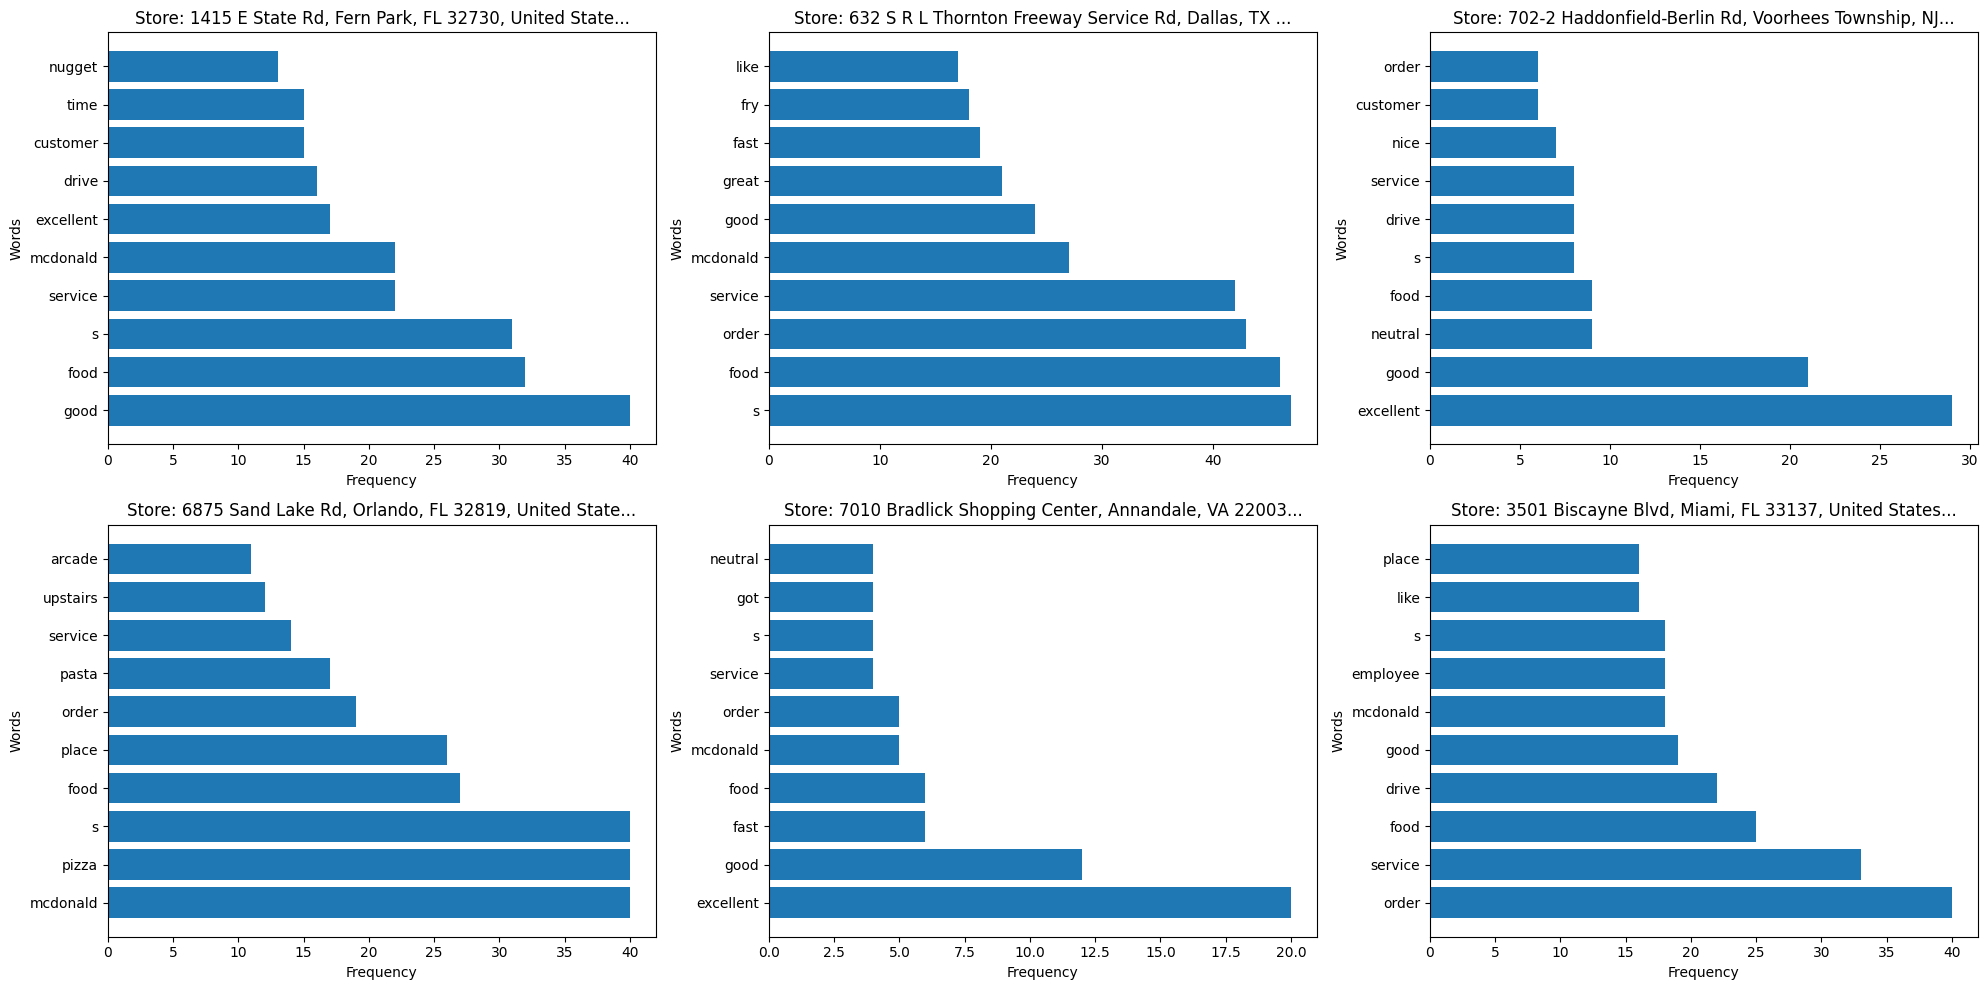

In [8]:
import matplotlib.pyplot as plt

# Select a few stores for visualization
selected_stores = list(word_counts_by_store_alt.keys())[:6]  # Taking the first 6 stores for demonstration

plt.figure(figsize=(20, 10))

for i, store_address in enumerate(selected_stores, 1):
    # Get the top 10 most common words for the store
    word_counts = word_counts_by_store_alt[store_address].most_common(10)
    words, counts = zip(*word_counts)
    
    plt.subplot(2, 3, i)
    plt.barh(words, counts)
    plt.title(f'Store: {store_address[:50]}...')  # Truncate address for readability
    plt.xlabel('Frequency')
    plt.ylabel('Words')

plt.tight_layout()
plt.show()


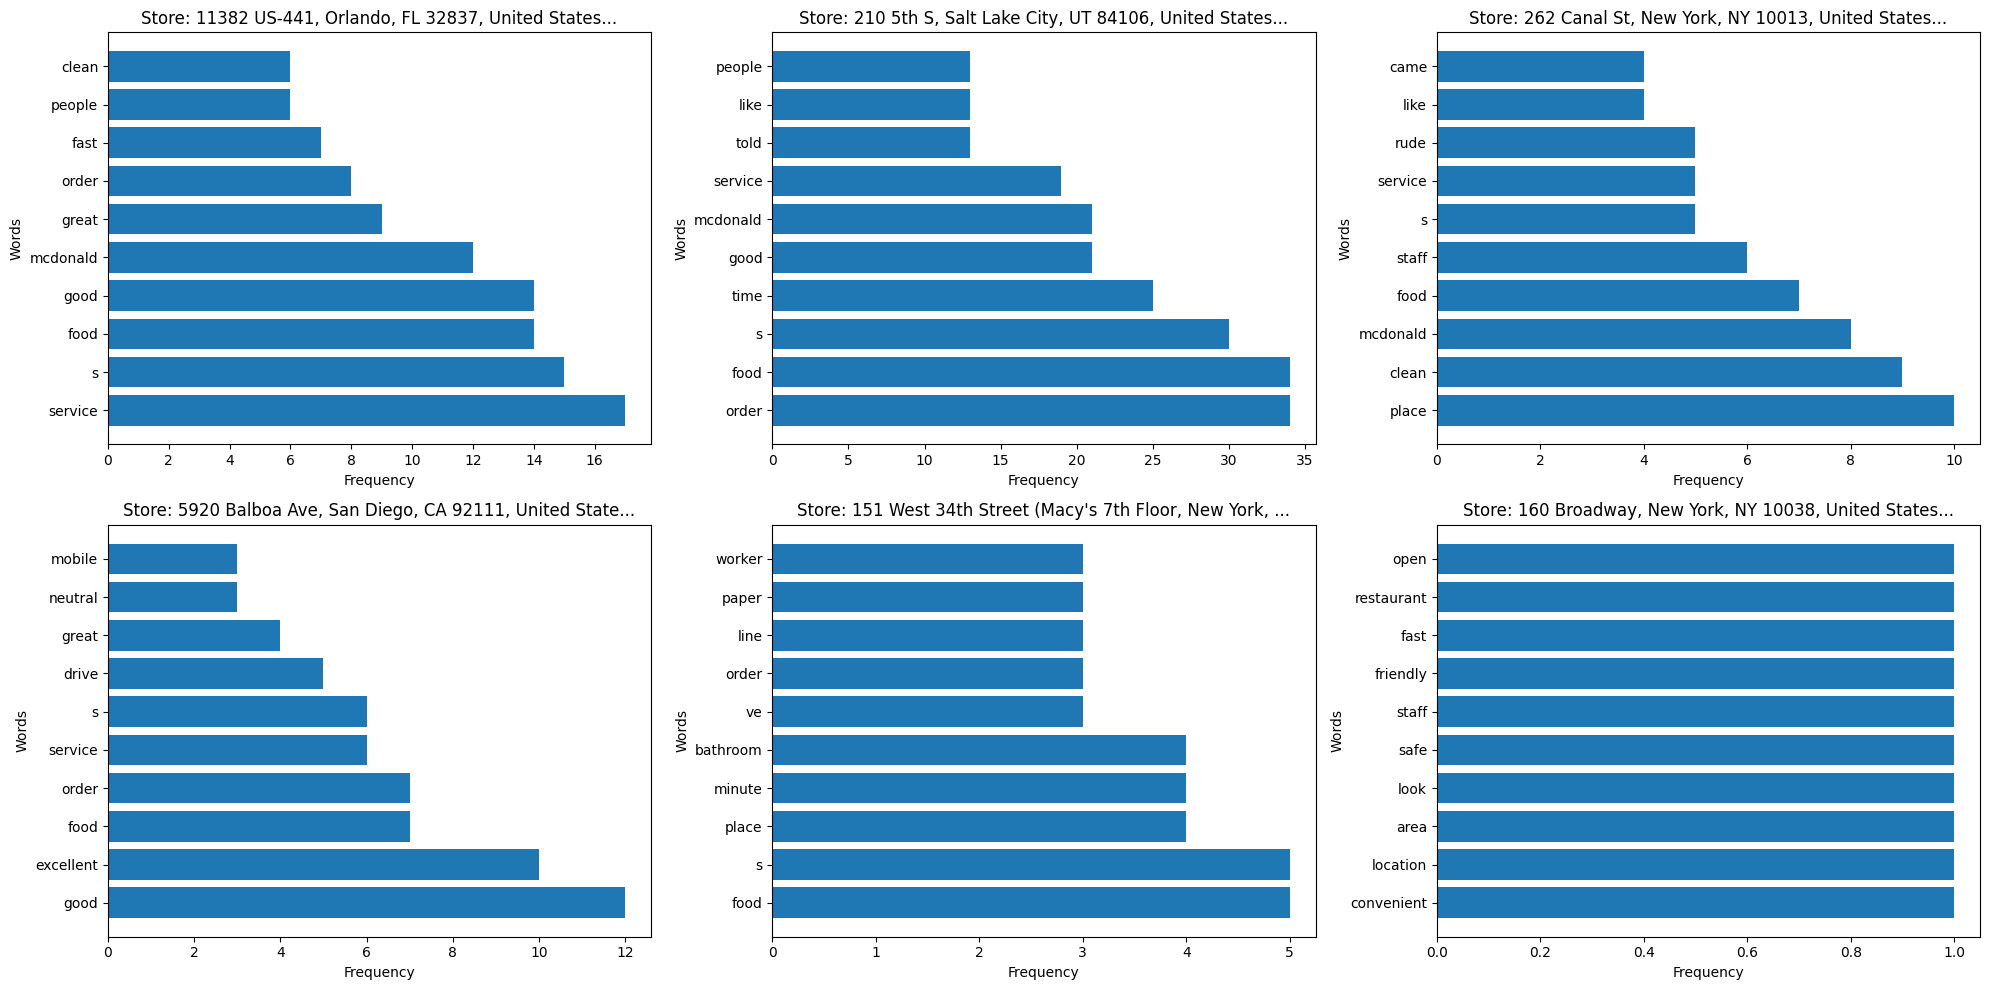

In [9]:
import matplotlib.pyplot as plt

# Select a few stores for visualization
selected_stores = list(word_counts_by_store_alt.keys())[-6:]  # Taking the last 6 stores for demonstration

plt.figure(figsize=(20, 10))

for i, store_address in enumerate(selected_stores, 1):
    # Get the top 10 most common words for the store
    word_counts = word_counts_by_store_alt[store_address].most_common(10)
    words, counts = zip(*word_counts)
    
    plt.subplot(2, 3, i)
    plt.barh(words, counts)
    plt.title(f'Store: {store_address[:50]}...')  # Truncate address for readability
    plt.xlabel('Frequency')
    plt.ylabel('Words')

plt.tight_layout()
plt.show()

In [10]:
# Assuming the original data is already loaded in 'data'
# Create a new column with the top 10 word frequency dictionaries for each store_address

# Generate the top 10 word frequency dictionary for each store
top_10_word_freqs = {store: dict(word_counts.most_common(10)) for store, word_counts in word_counts_by_store_alt.items()}

# Map the top 10 word frequencies to each row based on store_address
data['Top_10_Word_Frequencies'] = data['store_address'].apply(lambda x: top_10_word_freqs.get(x, {}))




In [11]:
# Merge the datasets on their address columns
merged_df = pd.merge(averages_df, data[['store_address', 'Top_10_Word_Frequencies','latitude','longitude']],
                     left_on='Store Address', right_on='store_address', how='left')

# Drop the duplicate 'store_address' column after merging
merged_df.drop(columns=['store_address'], inplace=True)

# Remove duplicate rows based on the 'Store Address' column while keeping the first occurrence
merged_df_unique = merged_df.drop_duplicates(subset=['Store Address']).reset_index(drop=True)

# Display the first few rows of the deduplicated dataframe
merged_df_unique.head()


,Store Address,Average Sentiment Score,Average Rate,Rank,Top_10_Word_Frequencies,latitude,longitude
0,"7010 Bradlick Shopping Center, Annandale, VA 2...",0.484544,3.932203,1.0,"{'excellent': 20, 'good': 12, 'fast': 6, 'food...",38.812823,-77.185055
1,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",0.462471,3.836735,2.0,"{'excellent': 29, 'good': 21, 'neutral': 9, 'f...",39.852059,-74.981099
2,"5920 Balboa Ave, San Diego, CA 92111, United S...",0.460735,3.843137,3.0,"{'good': 12, 'excellent': 10, 'food': 7, 'orde...",32.820654,-117.178011
3,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",0.352566,3.559701,4.0,"{'good': 35, 'excellent': 26, 'food': 26, 'ord...",33.009318,-97.222925
4,"160 Broadway, New York, NY 10038, United States",0.339286,5.000000,5.0,"{'convenient': 1, 'location': 1, 'area': 1, 'l...",40.709375,-74.009979


In [12]:
save_data(merged_df_unique, "McDonald_s_Reviews_Averages_With_Top_10_Word_Frequencies.csv")

In [14]:
pip install dash


   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.2 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.2 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.1/10.2 MB 847.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.2 MB 888.4 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.2 MB 885.4 kB/s eta 0:00:12
   - -------------------------------------- 0.3/10.2 MB 965.4 kB/s eta 0:00:11
   - -------------------------------------- 0.3/10.2 MB 982.3 kB/s eta 0:00:11
   - -------------------------------------- 0.4/10.2 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.5/10.2 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/10.2 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/10.2 MB 1.2 MB/s eta 0:0

In [18]:
import pandas as pd
import plotly.express as px

# Assuming 'merged_df_unique' is your DataFrame name
# First, ensure that 'merged_df_unique' is loaded or prepared correctly
# If it's not loaded in this code snippet, replace 'merged_df_unique' with the correct DataFrame variable

# Create the 'hover_text' column
merged_df_unique['hover_text'] = merged_df_unique.apply(lambda row: f"Average Sentiment Score: {row['Average Sentiment Score']}\nAverage Rate: {row['Average Rate']}\nTop 10 Word Frequencies: {row['Top_10_Word_Frequencies']}", axis=1)

# Now, let's use this 'hover_text' in the Plotly map
fig = px.scatter_mapbox(merged_df_unique, lat='latitude', lon='longitude',
                        hover_name='hover_text',  # Now 'hover_text' should exist
                        color_discrete_sequence=['fuchsia'], zoom=3)
fig.update_layout(mapbox_style='open-street-map', autosize=True)

# Increase the size of the points
fig.update_traces(marker=dict(size=15))

file_path = str(PLOT_PATH) + "/McDonald's location information.html"
# Save the figure as HTML
fig.write_html(file_path, full_html=True, auto_open=False, config={"responsive": True})

fig.show()

